In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('hippoCorpusV2.csv') #Issues with multi-targets (more than 2) #https://www.kaggle.com/manishkc06/human-memory-and-cognition

#df=pd.read_csv('ad.data') #has mixed dtypes #http://archive.ics.uci.edu/ml/datasets/Internet+Advertisements
#df=pd.read_csv('covtype.data') #No null values #http://archive.ics.uci.edu/ml/datasets/Covertype
#df=pd.read_csv('abalone.data') #http://archive.ics.uci.edu/ml/datasets/Abalone
#df=pd.read_csv('cmc.data') #No ctaegorical values #http://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
#df=pd.read_csv('estonia-passenger-list.data') #Less than 600 samples https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster
#df=pd.read_csv('LusitaniaManifest.csv') #Very few samples after removing null values #https://www.kaggle.com/rkkaggle2/rms-lusitania-complete-passenger-manifest/code
#df=pd.read_csv('Debernardi et al 2020 data.csv') #https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer?select=Debernardi+et+al+2020+documentation.csv
df

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,when I got concert tickets,0.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,we saw the beautiful sky.,1.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,NaN,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,she went into labor early,0.500,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,finding out they were healthy.,1.000,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,NaN,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,When I don't answer the phone in case I owe th...,0.250,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,926,KVSO6L8P,30.0,woman,other,3.0,5.0,3.0,5.0,...,the kitten ran into my arms.,0.125,NaN,NaN,NaN,NaN,My dog was diagnosed with lymphoma a year ago ...,5.0,"My dog, who had lymphoma, was suffering so I h...",150.0
6850,39PAAFCODNMWRITC4CBO6VRL6O4TV3,3044,QJB7AXPP,18.0,woman,asian,4.0,2.0,4.0,2.0,...,when i encountered an guy who was really scared,-0.500,NaN,NaN,NaN,NaN,"Over my vacation from my job, I went to Casper...",5.0,"On vacation, a side job was taken to plan an e...",570.0
6851,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,1008,IJP8D12L,35.0,man,asian,1.0,2.0,2.0,4.0,...,a lot of people got in the pool.,0.500,NaN,NaN,NaN,NaN,This event was a birthday party for my nephew....,2.0,This was a birthday party for my nephew that h...,21.0
6852,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,1462,LCKEHYRF,30.0,man,hisp,1.0,1.0,3.0,3.0,...,my cousin threw a tantrum in the middle of the...,0.500,NaN,NaN,NaN,NaN,This event occurred about two weeks ago. I was...,2.0,It was my little cousin's birthday and went to...,14.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6854 entries, 0 to 6853
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AssignmentId       6854 non-null   object 
 1   WorkTimeInSeconds  6854 non-null   int64  
 2   WorkerId           6854 non-null   object 
 3   annotatorAge       6831 non-null   float64
 4   annotatorGender    6854 non-null   object 
 5   annotatorRace      6854 non-null   object 
 6   distracted         6854 non-null   float64
 7   draining           6854 non-null   float64
 8   frequency          4098 non-null   float64
 9   importance         6710 non-null   float64
 10  logTimeSinceEvent  6854 non-null   float64
 11  mainEvent          6854 non-null   object 
 12  memType            6854 non-null   object 
 13  mostSurprising     6854 non-null   object 
 14  openness           6854 non-null   float64
 15  recAgnPairId       2619 non-null   object 
 16  recImgPairId       5328 

In [4]:
df.isnull().sum()

AssignmentId            0
WorkTimeInSeconds       0
WorkerId                0
annotatorAge           23
annotatorGender         0
annotatorRace           0
distracted              0
draining                0
frequency            2756
importance            144
logTimeSinceEvent       0
mainEvent               0
memType                 0
mostSurprising          0
openness                0
recAgnPairId         4235
recImgPairId         1526
similarity           4098
similarityReason     4098
story                   0
stressful               0
summary                 0
timeSinceEvent          0
dtype: int64

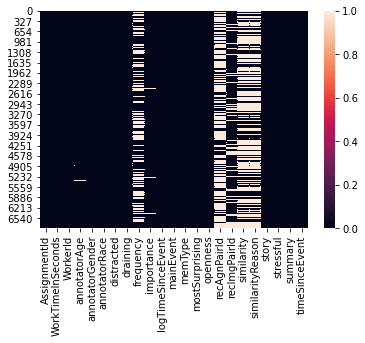

In [5]:
sns.heatmap(df.isnull())

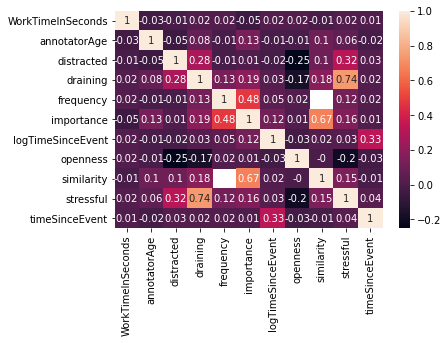

In [6]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)